In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [76]:
""" 
Functions will all be in the form of x(Xt+1, Yt+1) = x(Xt, Yt) - define
function by using Xt.

Use numpy for math notation. E.g. np.sqrt(Xt, Yt)

"""
def f(Xt, Yt):
    return -0.4*Xt - 0.2*Yt

def g(Xt, Yt):
    return 0.2*Xt - 0.9*Yt

In [77]:
"""
Recursive formula draws out the dynamic path from any initial condition.

"""

def dynamics(x,
             y,
             x_init,
             y_init,
             x_path = [],
             y_path = [],
             x_inits = [],
             y_inits = [],
             x_deltas = [],
             y_deltas = []
            ):
    
    # passing through our lists
    x_path = x_path
    y_path = y_path
    x_inits = x_inits
    y_inits = y_inits
    x_deltas = x_deltas
    y_deltas = y_deltas
    
    # evaluating our functions
    x_val = f(x_init, y_init)
    y_val = g(x_init, y_init)
    
    # finding the change
    x_delta = abs(abs(x_val) - abs(x_init))
    y_delta = abs(abs(y_val) - abs(y_init))
    
    # appending our paths with the new value
    x_path.append(x_val)
    y_path.append(y_val)
    
    x_inits.append(x_init)
    y_inits.append(y_inits)
    
    x_deltas.append(x_delta)
    y_deltas.append(y_delta)
    
    # checking if we have converged
    
    if x_delta < 0.001:
        
        x_inits[-1] = round(x_val, 4)
        
        if y_delta < 0.001:
        
            y_inits[-1] = round(y_val, 4)
            
            return round(x_val, 4), round(y_val, 4), x_path, y_path
            
    if y_delta < 0.001:

        y_inits[-1] = round(y_val, 4)
        
        if x_delta < 0.001:
        
            x_inits[-1] = round(x_val, 4)
            
            return round(x_val, 4), round(y_val, 4), x_path, y_path
        
    if len(x_deltas) > 10:
        
        if x_deltas[-1] > x_deltas[-2]:
            print('x is divergent')

            if y_deltas[-1] > y_deltas[-2]:
                print('y is divergent')
                return None, None, dynamic_path

    return dynamics(f, 
                    g, 
                    x_val,
                    y_val,
                    x_path = x_path,
                    y_path = y_path,
                    x_inits = x_inits,
                    y_inits = y_inits
                   )

In [78]:
# setting our initial condition and calling the dynamics function

x_init = 0.5
y_init = 0.5

x, y, x_path, y_path = dynamics(x, y, x_init, y_init)

In [82]:
# x convergence approximation

x

0.0019

In [83]:
# y convergence approximation
y

0.0038

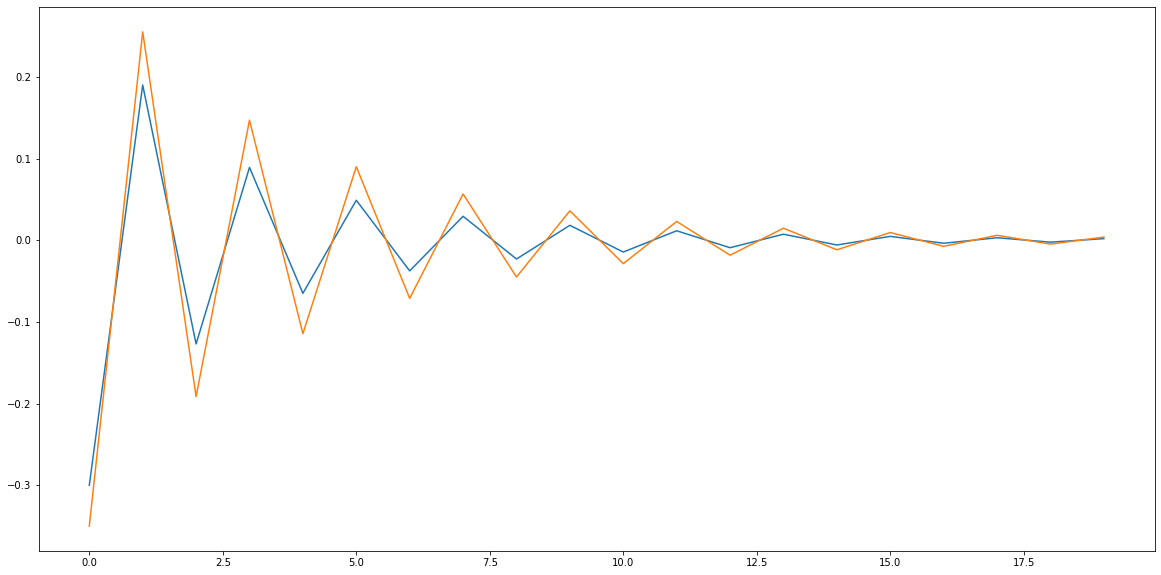

In [84]:
# plotting x and y dynamic paths

import pandas as pd
pd.Series(x_path).plot(figsize = (20,10))
pd.Series(y_path).plot();

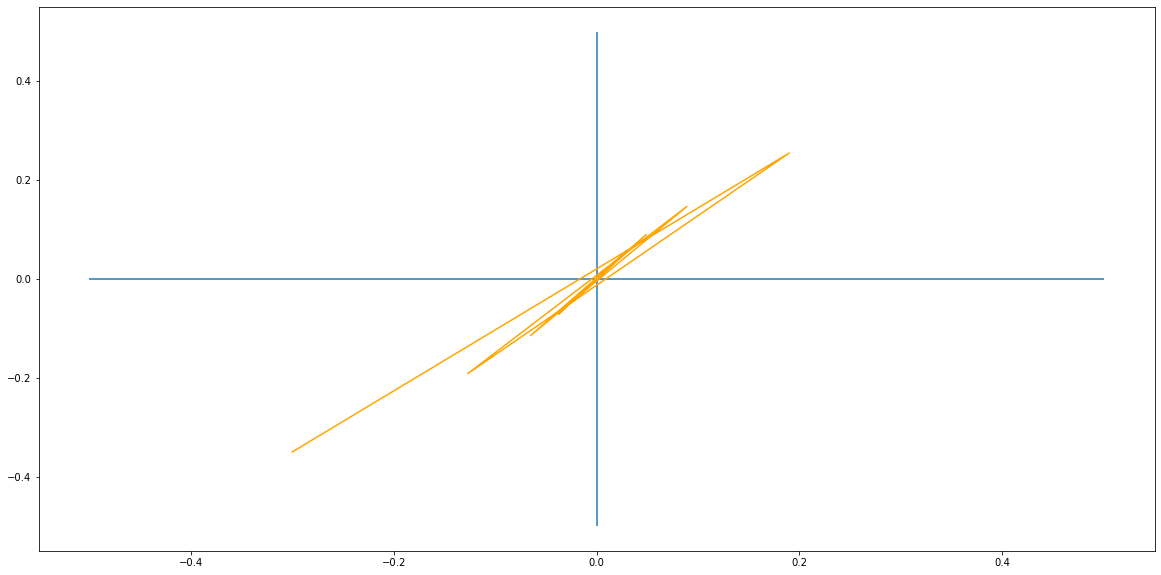

In [85]:
# plotting the phase plane / phase portrait

fig, ax = plt.subplots(figsize = (20,10))

ax.plot(x_path, y_path, color = 'orange');

ax.vlines(x = 0, ymin = -.2, ymax = .5);
ax.hlines(y = 0, xmin = -.5, xmax = .5);